## Import Packages and create db connection

Things to do to practice.

(i) Display the names of the tables in the database.

(ii) Display the names of the columns in the table Master. 

(iii) Display the number of rows in the table Master.

(iv) Display the nameFirst and nameLast for players whose weight is greater than 280. 

In [1]:
import sqlite3
import pandas as pd
import numpy as np
import seaborn as sb

In [2]:
from sqlite3 import Error

def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by the db_file
    :param db_file: database file
    :return: Connection object or None
    """
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return None

In [3]:
database = "/Users/dbenit/sql-practice/lahman2016.db" # Update this to where the directory of your lahman2016.db file
 
# create a database connection
conn = create_connection(database)
cursor = conn.cursor()

In [4]:
#i display table names
for row in cursor.execute("SELECT name FROM sqlite_master WHERE type='table';"):
    print(row)

('AllstarFull',)
('Appearances',)
('AwardsManagers',)
('AwardsPlayers',)
('AwardsShareManagers',)
('AwardsSharePlayers',)
('Batting',)
('BattingPost',)
('CollegePlaying',)
('Fielding',)
('FieldingOF',)
('FieldingOFsplit',)
('FieldingPost',)
('HallOfFame',)
('HomeGames',)
('Managers',)
('ManagersHalf',)
('Master',)
('Parks',)
('Pitching',)
('PitchingPost',)
('Salaries',)
('Schools',)
('SeriesPost',)
('Teams',)
('TeamsFranchises',)
('TeamsHalf',)


In [5]:
#i
cursor.execute("SELECT * FROM Master")
columns = cursor.description
for col in columns:
    print(col[0])

playerID
birthYear
birthMonth
birthDay
birthCountry
birthState
birthCity
deathYear
deathMonth
deathDay
deathCountry
deathState
deathCity
nameFirst
nameLast
nameGiven
weight
height
bats
throws
debut
finalGame
retroID
bbrefID


In [6]:
#iii
cursor.execute("SELECT COUNT(*) from Master")
print ("The number of rows in the Master table are:",cursor.fetchall()[0])

The number of rows in the Master table are: (19105,)


In [7]:
#iv
cursor.execute("SELECT nameFIRST, nameLAST FROM Master WHERE weight>280 ")
cursor.fetchall()

[('Jumbo', 'Brown'),
 ('Jonathan', 'Broxton'),
 ('Bartolo', 'Colon'),
 ('Adam', 'Dunn'),
 ('Jeff', 'Niemann'),
 ('Chad', 'Paronto'),
 ('Calvin', 'Pickering'),
 ('Jon', 'Rauch'),
 ('Tyler', 'Robertson'),
 ('CC', 'Sabathia'),
 ('Kennys', 'Vargas'),
 ('Dmitri', 'Young'),
 ('Walter', 'Young')]

## More practice

(i) Group players in the Master table with the same birthyear, and report the birthyear, the average height, and the number of players for each birthyear. Order the results by birthyear ascending. Save the results into a Pandas DataFrame. 

(ii) Plot the results in (i) using a lineplot with the average height on the y axis and year on the x-axis. 


(iii) Do the same as in (i), but now only include groups with an average height > 70. 

(iv) Plot the results as in Part (ii)

In [8]:
#i
master = pd.read_sql_query("SELECT birthYear,avg(height), COUNT(*)FROM Master GROUP BY birthYear", conn)
master.fillna(0)

,birthYear,avg(height),COUNT(*)
0,0.0,69.416667,132
1,1820.0,0.000000,1
2,1824.0,0.000000,1
3,1831.0,0.000000,1
4,1832.0,0.000000,2
...,...,...,...
162,1992.0,73.663636,110
163,1993.0,73.803571,56
164,1994.0,73.838710,31
165,1995.0,74.500000,6


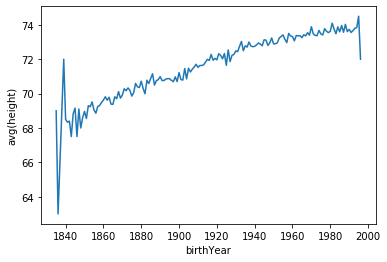

In [9]:
#iv
sb.lineplot(master['birthYear'],master["avg(height)"])

In [10]:
#iii
master_htgt70 = pd.read_sql_query("SELECT birthYear,avg(height), COUNT(*)FROM Master GROUP BY birthYear HAVING avg(height) > 70", conn)

In [11]:
master_htgt70

,birthYear,avg(height),COUNT(*)
0,1839,72.000000,1
1,1868,70.114286,90
2,1871,70.283019,64
3,1872,70.169492,71
4,1873,70.329114,86
...,...,...,...
121,1992,73.663636,110
122,1993,73.803571,56
123,1994,73.838710,31
124,1995,74.500000,6


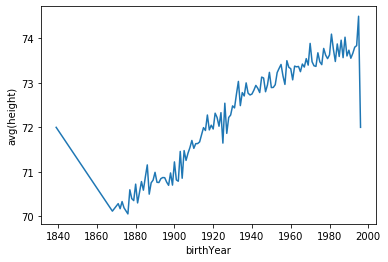

In [12]:
#iv
sb.lineplot(master_htgt70['birthYear'],master_htgt70["avg(height)"])

## Part III

(i) Find the namefirst, namelast, playerid and yearid of all players who were successfully inducted into the Hall of Fame in descending order of yearid. Save the results into a Pandas DataFrame.

(ii) Display the first 10 rows of the dataframe in (i). 

(iii) Display the total number of rows of the dataframe in (i).


(iv) Find the people who were successfully inducted into the Hall of Fame and played in college at a school located in the state of California. For each person, return their namefirst, namelast, playerid, school name (name_full), and yearid in descending order of yearid. Break ties on yearid by school name (ascending). yearid refers to the year of induction into the Hall of Fame. Save the results in a dataframe and display the entire dataframe. 

In [13]:
#i 
result = pd.read_sql_query("SELECT M.nameFirst, M.nameLast, H.playerID, H.yearID FROM Master as M, HallofFame as H WHERE H.inducted = 'Y' and M.playerID=H.playerID ORDER BY H.yearID DESC", conn )

In [14]:
#ii
result.head(10)

,nameFirst,nameLast,playerID,yearid
0,Jeff,Bagwell,bagweje01,2017
1,Tim,Raines,raineti01,2017
2,Ivan,Rodriguez,rodriiv01,2017
3,John,Schuerholz,schurjo99,2017
4,Bud,Selig,seligbu99,2017
5,Ken,Griffey,griffke02,2016
6,Mike,Piazza,piazzmi01,2016
7,Craig,Biggio,biggicr01,2015
8,Randy,Johnson,johnsra05,2015
9,Pedro,Martinez,martipe02,2015


In [15]:
#iii
result

,nameFirst,nameLast,playerID,yearid
0,Jeff,Bagwell,bagweje01,2017
1,Tim,Raines,raineti01,2017
2,Ivan,Rodriguez,rodriiv01,2017
3,John,Schuerholz,schurjo99,2017
4,Bud,Selig,seligbu99,2017
...,...,...,...,...
312,Ty,Cobb,cobbty01,1936
313,Walter,Johnson,johnswa01,1936
314,Christy,Mathewson,mathech01,1936
315,Babe,Ruth,ruthba01,1936


In [16]:
print("The number of rows in the dataframe: ", result.shape[0])

The number of rows in the dataframe:  317


In [17]:
#iv
result_distinct = pd.read_sql_query("select distinct M.nameFirst,M.nameLast, H.playerID, S.name_full, H.yearID from CollegePlaying C inner join Schools S on C.schoolID = S.schoolID inner join Master M on M.playerID = C.playerID inner join HallofFame H on M.playerID = H.playerID where H.inducted ='Y' and S.state = 'CA' order by H.yearID desc, S.name_full",conn)

In [18]:
result_distinct

,nameFirst,nameLast,playerID,name_full,yearid
0,Randy,Johnson,johnsra05,University of Southern California,2015
1,Pat,Gillick,gillipa99,Los Angeles Valley College,2011
2,Pat,Gillick,gillipa99,University of Southern California,2011
3,Doug,Harvey,harvedo99,San Diego State University,2010
4,Dick,Williams,willidi02,Pasadena City College,2008
5,Tony,Gwynn,gwynnto01,San Diego State University,2007
6,Ozzie,Smith,smithoz01,"California Polytechnic State University, San L...",2002
7,Tom,Seaver,seaveto01,Fresno City College,1992
8,Tom,Seaver,seaveto01,University of Southern California,1992
9,Joe,Morgan,morgajo02,Merritt College,1990


In [19]:
result_nonDistinct = pd.read_sql_query("select M.nameFirst,M.nameLast, H.playerID, S.name_full, H.yearID from CollegePlaying C inner join Schools S on C.schoolID = S.schoolID inner join Master M on M.playerID = C.playerID inner join HallofFame H on M.playerID = H.playerID where H.inducted ='Y' and S.state = 'CA' order by H.yearID desc, S.name_full",conn)
result_nonDistinct

,nameFirst,nameLast,playerID,name_full,yearid
0,Randy,Johnson,johnsra05,University of Southern California,2015
1,Randy,Johnson,johnsra05,University of Southern California,2015
2,Randy,Johnson,johnsra05,University of Southern California,2015
3,Pat,Gillick,gillipa99,Los Angeles Valley College,2011
4,Pat,Gillick,gillipa99,University of Southern California,2011
5,Pat,Gillick,gillipa99,University of Southern California,2011
6,Doug,Harvey,harvedo99,San Diego State University,2010
7,Doug,Harvey,harvedo99,San Diego State University,2010
8,Dick,Williams,willidi02,Pasadena City College,2008
9,Tony,Gwynn,gwynnto01,San Diego State University,2007


## Part IV

Find the namefirst, namelast, playerid, yearid, and single-year slg (Slugging Percentage) of the players and save the results in a dataframe. For statistical significance, only include players with more than 50 at-bats in the season. Order the results by slg descending. 

Display the players with the 10 best annual Slugging Percentage recorded over all time. 

Slugging Percentage is not provided in the database. It can be computed using a formula given at https://en.wikipedia.org/wiki/Slugging_percentage and the data in the database. Note that there is one term in the formula that is not directly available as a column in the database. You will have to compute it using some of the columns. 

Also, you have to compute slg as a floating point number, so make sure to use SQL in a way to get this. 

In [20]:
#number of singles = total hits - sum of doubles, triples and home runs
slg = pd.read_sql_query("select M.playerID, M.nameFirst ,M.nameLast, B.yearID,  ((cast ((B.H-(B.'2B'+B.'3B'+B.HR)) as float) + cast (2*B.'2B' as float) + cast(3*B.'3B' as float) + cast(4*B.HR as float))/ cast(B.AB as float)) as 'slg' from Master as M inner join Batting as B on M.playerID = B.playerID where B.AB > 50 order by slg desc",conn)
slg.head(10)

,playerID,nameFirst,nameLast,yearID,slg
0,spencsh01,Shane,Spencer,1998,0.910448
1,willite01,Ted,Williams,1953,0.901099
2,bondsba01,Barry,Bonds,2001,0.863445
3,ruthba01,Babe,Ruth,1920,0.849015
4,ruthba01,Babe,Ruth,1921,0.846296
5,bakerje03,Jeff,Baker,2006,0.824561
6,anderma02,Marlon,Anderson,2006,0.812500
7,bondsba01,Barry,Bonds,2004,0.812332
8,bondsba01,Barry,Bonds,2002,0.799007
9,ruthba01,Babe,Ruth,1927,0.772222


## Part V

(i) Find the yearid, min, max, and average of all player salaries for each year recorded, ordered by yearid in ascending order. Save the results as a dataframe and display it. 

(ii) For the player salaries in 2016, display a histogram with 10 bins. You may use the dataframe.hist(bin=10) function to do this. Also, it may be nicer to divide the salaries by 1,000,000 to show the amounts in millions. 

In [21]:
#i
salaries = pd.read_sql_query("select min(S.salary) as 'Minimum Salary', max(S.salary) as 'Maximum Salary', avg(S.salary) as 'Avg Salary', S.yearID from Salaries as S group by S.yearID order by S.yearID",conn)
salaries

,Minimum Salary,Maximum Salary,Avg Salary,yearID
0,60000.0,2130300.0,4.762994e+05,1985
1,60000.0,2800000.0,4.171470e+05,1986
2,62500.0,2127333.0,4.347295e+05,1987
3,62500.0,2340000.0,4.531711e+05,1988
4,62500.0,2766667.0,5.063231e+05,1989
5,100000.0,3200000.0,5.119737e+05,1990
6,100000.0,3800000.0,8.949612e+05,1991
7,109000.0,6100000.0,1.047521e+06,1992
8,0.0,6200000.0,9.769666e+05,1993
9,50000.0,6300000.0,1.049589e+06,1994


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff0c0ad2d10>]],
      dtype=object)

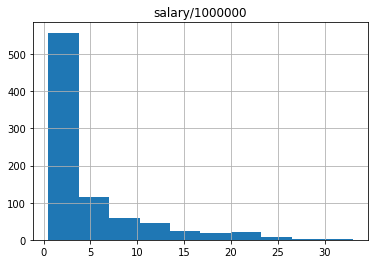

In [22]:
#ii
sal = pd.read_sql_query('select salary/1000000 from Salaries where yearID = "2016"',conn)
sal.hist(bins=10)

## Part VI

Extract and display a facet of the dataset that you think is interesting. This should not be a facet from Parts I-V. 

In [23]:
#displaying the players in descending order of the number of awards they have won
pd.read_sql_query("select  A.playerID, M.nameFirst, M.nameLast, count(A.awardID) as 'TotalAwards' from Awardsplayers as A inner join Master as M on A.playerID = M.playerID group by A.playerID order by TotalAwards desc", conn)

,playerID,nameFirst,nameLast,TotalAwards
0,bondsba01,Barry,Bonds,47
1,willite01,Ted,Williams,39
2,dimagjo01,Joe,DiMaggio,36
3,musiast01,Stan,Musial,34
4,schmimi01,Mike,Schmidt,33
...,...,...,...,...
1338,alouma01,Matty,Alou,1
1339,aloufe01,Felipe,Alou,1
1340,allisbo01,Bob,Allison,1
1341,akerja01,Jack,Aker,1
